# 第4章 随机变量的概率分布

## 初始化

In [1]:
# 本章需要用到的库
import numpy as np # 导入numpy库
import pandas as pd # 导入pandas库
from scipy.stats import binom, norm, chi2, t, f # 导入二项分布、正态分布、卡方分布、t分布、F分布
import matplotlib.pyplot as plt # 导入matplotlib库
import seaborn as sns # 导入seaborn库

# 设置初始化
plt.rcParams['font.sans-serif'] = ['SimHei'] # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False # 用来正常显示负号

## 4.1 什么是概率

## 4.2 随机变量的概率分布

### 4.2.1 随机变量及其概括性度量

In [3]:
example4_1 = pd.read_csv('./pydata/chap04/example4_1.csv', encoding='gbk') # 读取数据
example4_1

,不合格品数,概率
0,0,0.75
1,1,0.12
2,2,0.08
3,3,0.05


In [5]:
mymean = sum(example4_1['不合格品数'] * example4_1['概率']) # 计算期望值
myvar = sum((example4_1['不合格品数'] - mymean)**2 * example4_1['概率']) # 计算方差
mystd = np.sqrt(myvar) # 计算标准差

print('期望值：', round(mymean, 4)) # 输出期望值
print('方  差：', round(myvar, 4)) # 输出方差
print('标准差：', round(mystd, 4)) # 输出标准差

期望值： 0.43
方  差： 0.7051
标准差： 0.8397


### 4.2.2 随机变量的概率分布

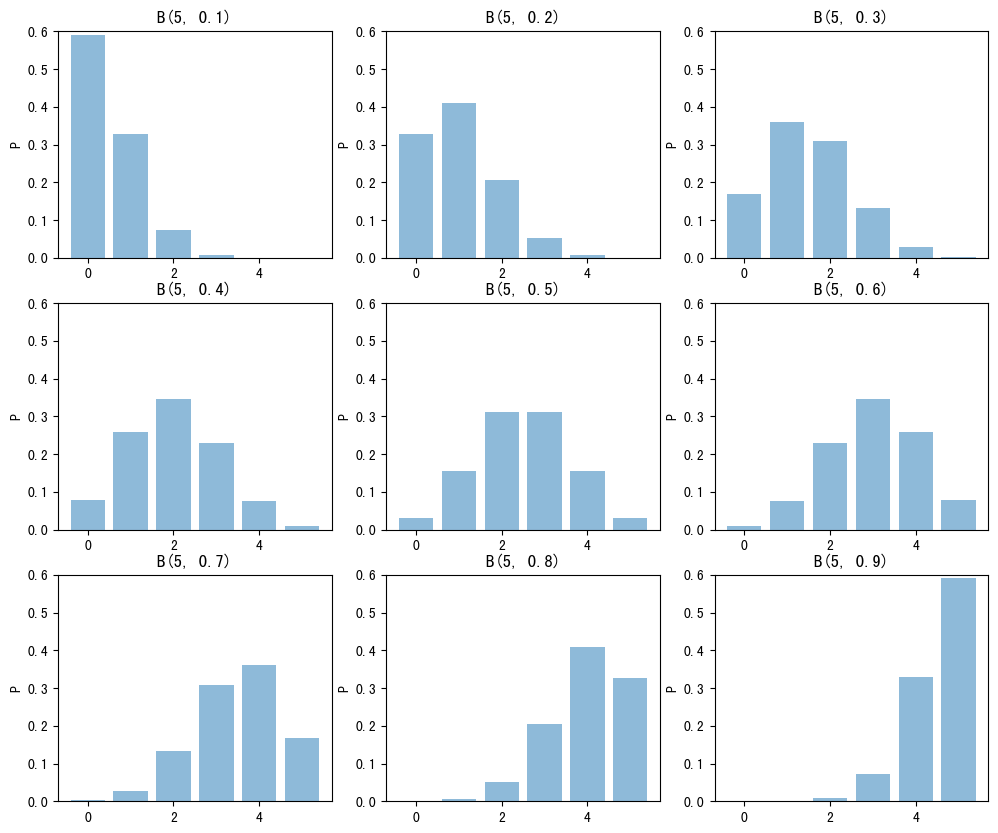

In [26]:
# 二项分布Binomial(5, p)图
plt.figure(figsize=(12, 10)) # 设置画布大小
for p in np.linspace(0.1, 0.9, 9):
    p = round(p, 1) # 保留一位小数
    plt.subplot(3, 3, round(p*10)) # 设置子图位置
    x = np.arange(0, 6, 1) # 生成x轴数据
    y = binom.pmf(x, 5, p) # 生成y轴数据
    plt.bar(x, y, alpha=0.5, label=f'p={p}') # 绘制柱状图
    plt.title(f'B(5, {p})') # 设置子图标题
    plt.ylim(0, 0.6) # 设置y轴范围
    plt.ylabel('P') # 设置y轴标签
plt.show() # 显示图形

In [7]:
# 计算二项分布的概率
p0 = binom.pmf(0, 5, 0.06) # 没有不合格品的概率
p1 = binom.pmf(1, 5, 0.06) # 恰好有1个不合格品的概率
p3 = binom.cdf(3, 5, 0.06) # 最多有3个不合格品的概率
print('P(X =0)=', round(p0, 6)) # 输出没有不合格品的概率
print('P(X =1)=', round(p1, 6)) # 输出恰好有1个不合格品的概率
print('P(X<=3)=', round(p3, 6)) # 输出最多有3个不合格品的概率

P(X =0)= 0.733904
P(X =1)= 0.234225
P(X<=3)= 0.999938


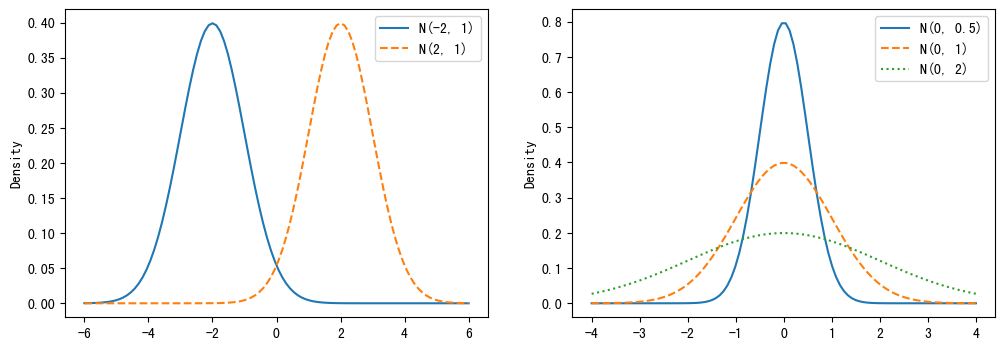

In [32]:
# 绘制正态分布曲线
plt.figure(figsize=(12, 4)) # 设置画布大小

# N(-2, 1)和N(2, 1)的概率密度函数图
plt.subplot(1, 2, 1) # 设置子图位置
x = np.linspace(-6, 6, 100) # 生成x轴数据
y1 = norm.pdf(x, -2, 1) # 生成y轴数据
y2 = norm.pdf(x, 2, 1) # 生成y轴数据
plt.plot(x, y1, '-', label='N(-2, 1)') # 绘制曲线
plt.plot(x, y2, '--', label='N(2, 1)') # 绘制曲线
plt.ylabel('Density') # 设置y轴标签
plt.legend() # 显示图例

# N(0, 0.5)、N(0, 1)和N(0, 2)的概率密度函数图
plt.subplot(1, 2, 2) # 设置子图位置
x = np.linspace(-4, 4, 100) # 生成x轴数据
y1 = norm.pdf(x, 0, 0.5) # 生成y轴数据
y2 = norm.pdf(x, 0, 1) # 生成y轴数据
y3 = norm.pdf(x, 0, 2) # 生成y轴数据
plt.plot(x, y1, '-', label='N(0, 0.5)') # 绘制曲线
plt.plot(x, y2, '--', label='N(0, 1)') # 绘制曲线
plt.plot(x, y3, ':', label='N(0, 2)') # 绘制曲线
plt.ylabel('Density') # 设置y轴标签
plt.legend() # 显示图例

plt.show() # 显示图形

In [9]:
# 计算正态分布的概率和分位数
p1 = norm.cdf(40, loc=50, scale=10) # P(X<=40)
p2 = norm.cdf(40, 50, 10) - norm.cdf(30, 50, 10) # P(30<X<=40)
p3 = norm.cdf(2.5, loc=0, scale=1) # P(Z<=2.5)
p4 = norm.cdf(2) - norm.cdf(-1.5) # P(-1.5<Z<=2) 默认为标准正态分布
q = norm.ppf(0.025, loc=0, scale=1) # P(Z<=q)=0.025 累积概率为0.025时的Z值
print('P(X<=40)    =', round(p1, 4)) # 输出P(X<=40)
print('P(30<X<=40) =', round(p2, 4)) # 输出P(30<X<=40)
print('P(Z<=2.5)   =', round(p3, 4)) # 输出P(Z<=2.5)
print('P(-1.5<Z<=2)=', round(p4, 4)) # 输出P(-1.5<Z<=2)
print('q(0.25)     =', round(q, 4)) # 输出P(Z<=q)=0.025时的q

P(X<=40)    = 0.1587
P(30<X<=40) = 0.1359
P(Z<=2.5)   = 0.9938
P(-1.5<Z<=2)= 0.9104
q(0.25)     = -1.96


### 4.2.3 其他几个重要的统计分布

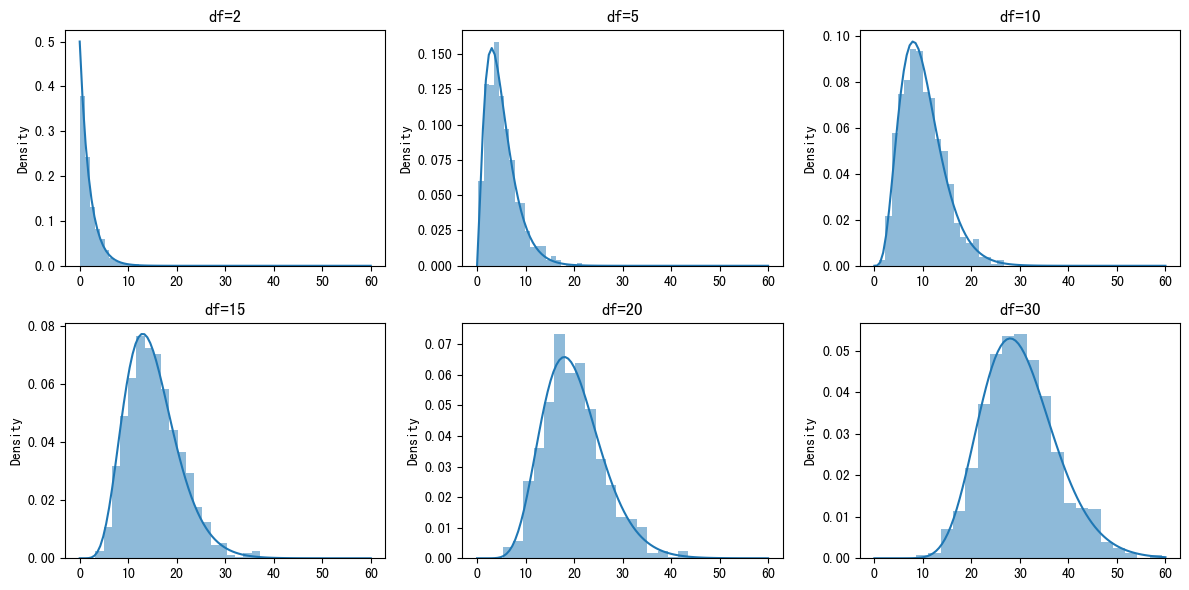

In [55]:
# 绘制不同自由度的chi2分布曲线
plt.figure(figsize=(12, 6)) # 设置画布大小
np.random.seed(1234) # 设置随机数种子
# 自由度为2, 5, 10, 15, 20, 30的chi2分布曲线
for i, df in enumerate([2, 5, 10, 15, 20, 30]):
    plt.subplot(2, 3, i+1) # 设置子图位置
    # 抽样数据的直方图
    sample = chi2.rvs(df, size=1000) # 生成抽样数据
    sns.histplot(sample, bins=20, stat='density', alpha=0.5, edgecolor='None') # 绘制直方图
    x = np.linspace(0, 60, 100) # 生成x轴数据
    y = chi2.pdf(x, df) # 生成y轴数据
    plt.plot(x, y, '-') # 绘制曲线
    plt.title(f'df={df}') # 设置子图标题
    plt.ylabel('Density') # 设置y轴标签
plt.tight_layout() # 设置子图间距
plt.show() # 显示图形

In [19]:
# 计算卡方分布的概率和分位数
p1 = chi2.cdf(10, df=15) # 自由度为15，卡方值小于等于10的概率
p2 = 1 - chi2.cdf(15, df=25) # 自由度为25，卡方值大于15的概率
q = chi2.ppf(0.95, df=10)  # 自由度为10，累积概率为0.95时的卡方值
print('P(X<=10, 15)=', round(p1, 6)) # 输出自由度为15，卡方值小于等于10的概率
print('P(X>15, 25) =', round(p2, 6)) # 输出自由度为25，卡方值大于15的概率
print('q(0.95, 10) =', round(q, 6)) # 输出自由度为10，累积概率为0.95时的卡方值

P(X<=10, 15)= 0.18026
P(X>15, 25) = 0.941383
q(0.95, 10) = 18.307038


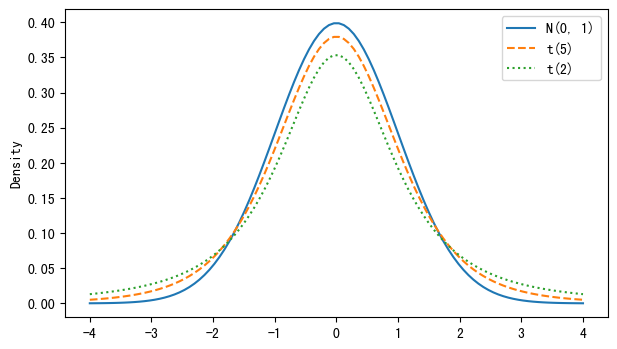

In [59]:
# 绘制不同自由度的t分布曲线
plt.figure(figsize=(7, 4)) # 设置画布大小

# N(0, 1)、t(5)、t(2)
x = np.linspace(-4, 4, 100) # 生成x轴数据
y1 = norm.pdf(x, 0, 1) # 生成y轴数据
y2 = t.pdf(x, 5) # 生成y轴数据
y3 = t.pdf(x, 2) # 生成y轴数据
plt.plot(x, y1, '-', label='N(0, 1)') # 绘制曲线
plt.plot(x, y2, '--', label='t(5)') # 绘制曲线
plt.plot(x, y3, ':', label='t(2)') # 绘制曲线
plt.ylabel('Density') # 设置y轴标签
plt.legend() # 显示图例
plt.show() # 显示图形

In [17]:
# 计算t分布的概率和分位数
p1 = t.cdf(-2, df=10) # 自由度为10，t值小于等于-2的概率
p2 = 1 - t.cdf(3, df=15) # 自由度为15，t值大于3的概率
q = t.ppf(0.975, df=25) # 自由度为25，累积概率为0.975时的t值
print('P(X<=-2, 10)=', round(p1, 6)) # 输出自由度为10，t值小于等于-2的概率
print('P(X>3, 15)  =', round(p2, 6)) # 输出自由度为15，t值大于3的概率
print('q(0.975, 25)=', round(q, 6)) # 输出自由度为25，累积概率为0.975时的t值

P(X<=-2, 10)= 0.036694
P(X>3, 15)  = 0.004486
q(0.975, 25)= 2.059539


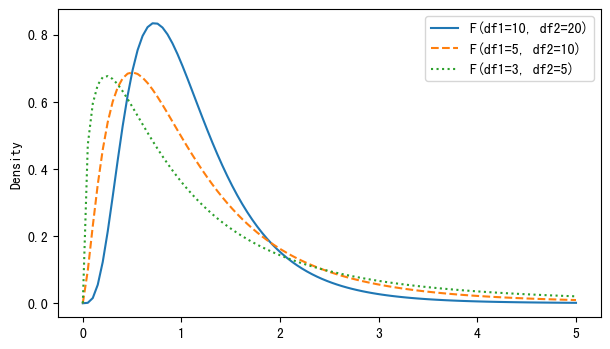

In [60]:
# 绘制不同自由度的F分布曲线
plt.figure(figsize=(7, 4)) # 设置画布大小
# F(10, 20)、F(5, 10)、F(3, 5)
x = np.linspace(0, 5, 100) # 生成x轴数据
y1 = f.pdf(x, 10, 20) # 生成y轴数据
y2 = f.pdf(x, 5, 10) # 生成y轴数据
y3 = f.pdf(x, 3, 5) # 生成y轴数据
plt.plot(x, y1, '-', label='F(df1=10, df2=20)') # 绘制曲线
plt.plot(x, y2, '--', label='F(df1=5, df2=10)') # 绘制曲线
plt.plot(x, y3, ':', label='F(df1=3, df2=5)') # 绘制曲线
plt.ylabel('Density') # 设置y轴标签
plt.legend() # 显示图例
plt.show() # 显示图形

In [18]:
# 计算F分布的概率和分位数
p1 = f.cdf(3, dfn=10, dfd=8) # 分子自由度为10，分母自由度为8，F值小于等于3的概率
p2 = 1 - f.cdf(2.5, dfn=18, dfd=15) # 分子自由度为18，分母自由度为15，F值大于2.5的概率
q = f.ppf(0.95, dfn=25, dfd=20) # 分子自由度为25，分母自由度为20，累积概率为0.95时的F值
print('P(X<=3, 10, 8)  =', round(p1, 6)) # 输出分子自由度为10，分母自由度为8，F值小于等于3的概率
print('P(X>2.5, 18, 15)=', round(p2, 6)) # 输出分子自由度为18，分母自由度为15，F值大于2.5的概率
print('q(0.95, 25, 20) =', round(q, 6)) # 输出分子自由度为25，分母自由度为20，累积概率为0.95时的F值

P(X<=3, 10, 8)  = 0.933549
P(X>2.5, 18, 15)= 0.03945
q(0.95, 25, 20) = 2.07392


## 4.3 样本统计量的概率分布

### 4.3.1 统计量及其分布

### 4.3.2 样本均值的抽样分布

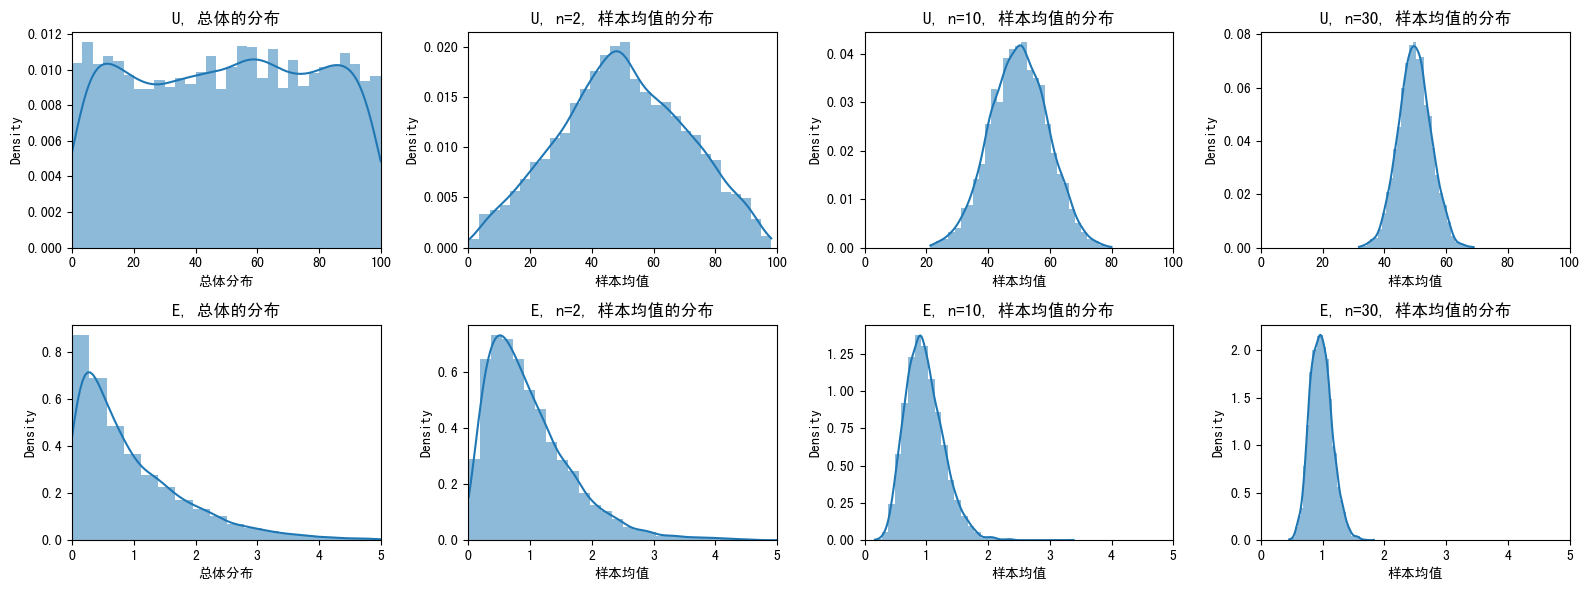

In [65]:
# 中心极限定理的模拟及可视化
# 随着抽样样本量的增大，样本均值的分布越来越接近正态分布
plt.figure(figsize=(16, 6)) # 设置画布大小
np.random.seed(1234) # 设置随机数种子
n_sample = [2, 10, 30] # 抽样量

plt.subplot(2, 4, 1) # 设置子图位置
U = np.random.uniform(0, 100, 5000) # 生成5000个均匀分布随机数作为总体U
sns.histplot(U, bins=30, stat='density', kde=True, alpha=0.5, edgecolor='None') # 绘制直方图
plt.xlim(0, 100) # 设置x轴范围
plt.title('U, 总体的分布') # 设置子图标题
plt.ylabel('Density') # 设置y轴标签
plt.xlabel('总体分布') # 设置x轴标签

for i, n in enumerate(n_sample):
    plt.subplot(2, 4, i+2) # 设置子图位置
    sample = np.zeros(5000) # 初始化抽样均值
    for i in range(5000):
        sample[i] = np.mean(np.random.choice(U, n)) # 随机选择n个样本，计算样本均值
    sns.histplot(sample, bins=30, stat='density', kde=True, alpha=0.5, edgecolor='None') # 绘制直方图
    plt.xlim(0, 100) # 设置x轴范围
    plt.title(f'U, n={n}, 样本均值的分布') # 设置子图标题
    plt.ylabel('Density') # 设置y轴标签
    plt.xlabel('样本均值') # 设置x轴标签

plt.subplot(2, 4, 5) # 设置子图位置
E = np.random.exponential(1, 5000) # 生成5000个指数分布随机数作为总体E
sns.histplot(E, bins=30, stat='density', kde=True, alpha=0.5, edgecolor='None') # 绘制直方图
plt.xlim(0, 5) # 设置x轴范围
plt.title('E, 总体的分布') # 设置子图标题
plt.ylabel('Density') # 设置y轴标签
plt.xlabel('总体分布') # 设置x轴标签

for i, n in enumerate(n_sample):
    plt.subplot(2, 4, i+6) # 设置子图位置
    sample = np.zeros(5000) # 初始化抽样均值
    for i in range(5000):
        sample[i] = np.mean(np.random.choice(E, n)) # 随机选择n个样本，计算样本均值
    sns.histplot(sample, bins=30, stat='density', kde=True, alpha=0.5, edgecolor='None') # 绘制直方图
    plt.xlim(0, 5) # 设置x轴范围
    plt.title(f'E, n={n}, 样本均值的分布') # 设置子图标题
    plt.ylabel('Density') # 设置y轴标签
    plt.xlabel('样本均值') # 设置x轴标签

plt.tight_layout() # 设置子图间距
plt.show() # 显示图形

### 4.3.3 样本方差的抽样分布

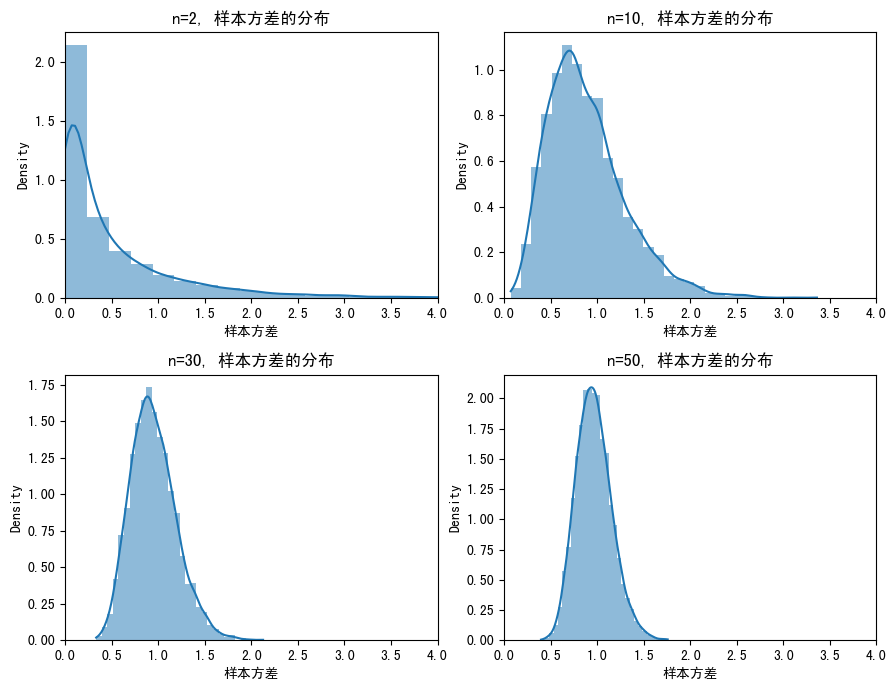

In [71]:
# 模拟不同样本量的样本方差分布
plt.figure(figsize=(9, 7)) # 设置画布大小
np.random.seed(1234) # 设置随机数种子
N = np.random.normal(0, 1, 5000) # 生成5000个标准正态分布随机数作为总体N
n_sample = [2, 10, 30, 50] # 抽样量

for i, n in enumerate(n_sample):
    plt.subplot(2, 2, i+1) # 设置子图位置
    sample = np.zeros(5000) # 初始化抽样方差
    for i in range(5000):
        sample[i] = np.var(np.random.choice(N, n)) # 随机选择n个样本，计算样本方差
    sns.histplot(sample, bins=30, stat='density', kde=True, alpha=0.5, edgecolor='None') # 绘制直方图
    plt.xlim(0, 4) # 设置x轴范围
    plt.title(f'n={n}, 样本方差的分布') # 设置子图标题
    plt.ylabel('Density') # 设置y轴标签
    plt.xlabel('样本方差') # 设置x轴标签

plt.tight_layout() # 设置子图间距
plt.show() # 显示图形

### 4.3.4 样本比例的抽样分布

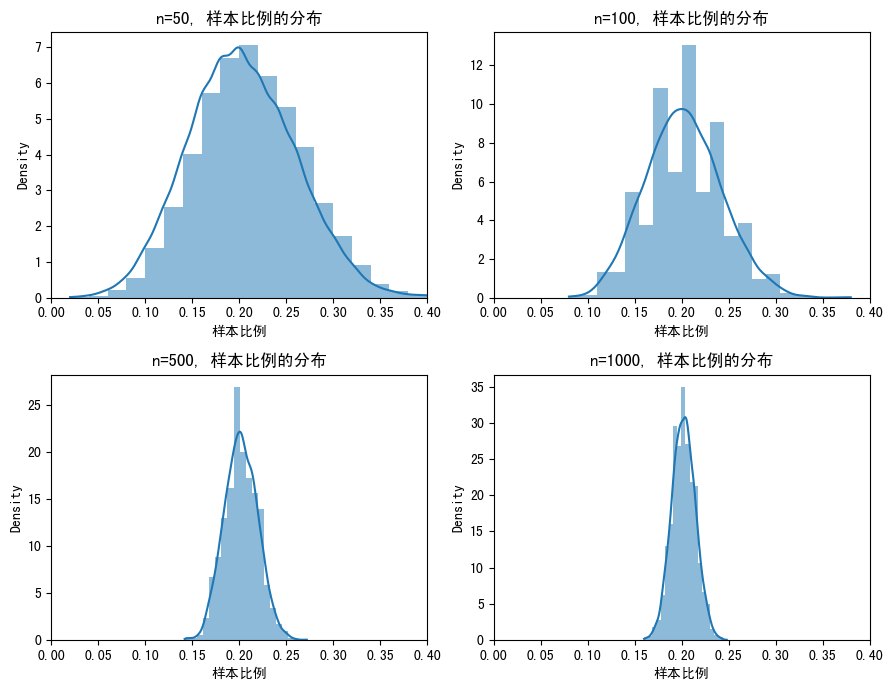

In [72]:
# 模拟不同样本量的样本比例的分布
plt.figure(figsize=(9, 7)) # 设置画布大小
np.random.seed(1234) # 设置随机数种子
P = np.random.binomial(1, 0.2, 5000) # 生成5000个二项分布随机数作为总体P, pi=0.2
n_sample = [50, 100, 500, 1000] # 抽样量

for i, n in enumerate(n_sample):
    plt.subplot(2, 2, i+1) # 设置子图位置
    sample = np.zeros(5000) # 初始化抽样比例
    for i in range(5000):
        sample[i] = np.mean(np.random.choice(P, n)) # 随机选择n个样本，计算样本比例
    sns.histplot(sample, bins=20, stat='density', kde=True, alpha=0.5, edgecolor='None') # 绘制直方图
    plt.xlim(0, 0.4) # 设置x轴范围
    plt.title(f'n={n}, 样本比例的分布') # 设置子图标题
    plt.ylabel('Density') # 设置y轴标签
    plt.xlabel('样本比例') # 设置x轴标签

plt.tight_layout() # 设置子图间距
plt.show() # 显示图形

### 4.3.5 统计量的标准误

## 习题

### 4.1

In [73]:
df = pd.read_csv('./exercise/chap04/exercise4_1.csv', encoding='gbk') # 读取数据
df

,X,P
0,0,0.041
1,1,0.130
2,2,0.209
3,3,0.223
4,4,0.178
5,5,0.114
6,6,0.061
7,7,0.028
8,8,0.011
9,9,0.004


In [78]:
# (1) 有2~5台（包括2台和5台在内）冷气机出现重要缺陷的概率。
p1 = df.query('2<=X<=5')['P'].sum() # 计算概率
print('P(2<=X<=5)=', p1) # 输出概率

P(2<=X<=5)= 0.724


In [77]:
# (2) 只有不到2台冷气机出现重要缺陷的概率。
p2 = df.query('X<2')['P'].sum() # 计算概率
print('P(X<2)=', p2) # 输出概率

P(X<2)= 0.171


In [79]:
# (3) 有超过5台冷气机出现重要缺陷的概率。
p3 = df.query('X>5')['P'].sum() # 计算概率
print('P(X>5)=', p3) # 输出概率

P(X>5)= 0.105


### 4.2

In [86]:
# (1) P(X=2)
p1 = binom.pmf(2, 4, 0.1) # 计算概率
print('P(X=2)=', p1) # 输出概率

P(X=2)= 0.0486


In [85]:
# (2) P(X<=2)
p2 = binom.cdf(2, 4, 0.1) # 计算概率
print('P(X<=2)=', p2) # 输出概率

P(X<=2)= 0.9963


### 4.3

In [88]:
# (1) X~N(500, 20^2), P(X>=510); P(400<=X<=450)。
p1 = 1 - norm.cdf(510, loc=500, scale=20) # 计算概率
p2 = norm.cdf(450, loc=500, scale=20) - norm.cdf(400, loc=500, scale=20) # 计算概率
print('P(X>=510)     =', round(p1, 4)) # 输出概率
print('P(400<=X<=450)=', round(p2, 4)) # 输出概率

P(X>=510)     = 0.3085
P(400<=X<=450)= 0.0062


In [89]:
# (2) Z~N(0, 1), P(0<=Z<=1.2); P(-0.48<=Z<=0); P(Z>=12)。
p1 = norm.cdf(1.2, 0, 1) - norm.cdf(0, 0, 1) # 计算概率
p2 = norm.cdf(0, 0, 1) - norm.cdf(-0.48, 0, 1) # 计算概率
p3 = 1 - norm.cdf(12, 0, 1) # 计算概率
print('P(0<=Z<=1.2)  =', round(p1, 4)) # 输出概率
print('P(-0.48<=Z<=0)=', round(p2, 4)) # 输出概率
print('P(Z>=12)      =', round(p3, 4)) # 输出概率

P(0<=Z<=1.2)  = 0.3849
P(-0.48<=Z<=0)= 0.1844
P(Z>=12)      = 0.0


In [90]:
# (3) 标准正态分布累积概率为0.95时的反函数值z。
q = norm.ppf(0.95, 0, 1) # 计算反函数值
print('q(0.95)=', round(q, 4)) # 输出反函数值

q(0.95)= 1.6449


### 4.4

In [91]:
# (1) X~t(df), df=15, t值小于-1.5的概率; df=20, t值大于2的概率; df=30, t分布右尾概率为0.05时的t值。
p1 = t.cdf(-1.5, df=15) # 计算概率
p2 = 1 - t.cdf(2, df=20) # 计算概率
q = t.ppf(0.95, df=30) # 计算反函数值
print('P(X<=-1.5, df=15)=', round(p1, 4)) # 输出概率
print('P(X>2, df=20)    =', round(p2, 4)) # 输出概率
print('q(0.95, df=30)   =', round(q, 4)) # 输出反函数值

P(X<=-1.5, df=15)= 0.0772
P(X>2, df=20)    = 0.0296
q(0.95, df=30)   = 1.6973


In [94]:
# (2) X~chi2(df), df=8, chi2值小于12的概率; df=20, chi2值大于18的概率; df=15, chi2分布右尾概率为0.025时的反函数值。
p1 = chi2.cdf(12, df=8) # 计算概率
p2 = 1 - chi2.cdf(18, df=20) # 计算概率
q = chi2.ppf(0.975, df=15) # 计算反函数值
print('P(X<=12, df=8) =', round(p1, 4)) # 输出概率
print('P(X>18, df=20) =', round(p2, 4)) # 输出概率
print('q(0.975, df=15)=', round(q, 4)) # 输出反函数值

P(X<=12, df=8) = 0.8488
P(X>18, df=20) = 0.5874
q(0.975, df=15)= 27.4884


In [95]:
# (3) X~F(df1, df2), df1=15, df2=10, F值小于3.5的概率; df1=12, df2=8, F值大于3的概率; 
# df1=20, df2=16, F分布右尾概率为0.025时的F值。
p1 = f.cdf(3.5, dfn=15, dfd=10) # 计算概率
p2 = 1 - f.cdf(3, dfn=12, dfd=8) # 计算概率
q = f.ppf(0.975, dfn=20, dfd=16) # 计算反函数值
print('P(X<=3.5, 15, 10)=', round(p1, 4)) # 输出概率
print('P(X>3, 12, 8)    =', round(p2, 4)) # 输出概率
print('q(0.975, 20, 16) =', round(q, 4)) # 输出反函数值

P(X<=3.5, 15, 10)= 0.9745
P(X>3, 12, 8)    = 0.0635
q(0.975, 20, 16) = 2.6808
